In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
#Display all columns in the dataframe
pd.set_option("display.max_columns", None)

#Read csv file
df2 = pd.read_csv(r'C:/Users/BURROW/data_portfolio/Iowa_Alcohol_sales/data/processed/2019_Iowa_Liquor_Sales_cleaned.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
#Check the rows and columns of the dataset
df2.shape

(2375581, 25)

In [4]:
#Check the first 5 rows of the dataset
df2.head()

,invoice_no,date,week,month,store_no,name,city,zipcode,latitude,longitude,county_no,county,category,sub_category,vendor_no,vendor,item,pack,bottle_vol_ml,bottle_cost,bottle_retail,bottles_sold,sales,gross_profit,vol_sold_liters
0,16681900011,01-02-19,1,1,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8
1,18211500001,03-19-19,12,3,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8
2,18940000006,04-23-19,17,4,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8
3,20214600005,06-25-19,26,6,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8
4,21680700022,09-04-19,36,9,5286,Sauce,Iowa City,52240,41.65926,-91.5344,52,Johnson,Imported Brandies,Brandy,420,Moet Hennessy Usa,Hennessy VS,24,200,6.24,9.36,24,224.64,3.12,4.8


In [5]:
df2.describe()

,invoice_no,week,month,store_no,zipcode,latitude,longitude,county_no,vendor_no,pack,bottle_vol_ml,bottle_cost,bottle_retail,bottles_sold,sales,gross_profit,vol_sold_liters
count,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06
mean,2.050285e+10,2.717519e+01,6.690740e+00,3.904240e+03,5.126653e+04,4.195707e+01,-9.302416e+01,5.730556e+01,2.647082e+02,1.242675e+01,8.765394e+02,1.034345e+01,1.551759e+01,1.128143e+01,1.467514e+02,5.174219e+00,9.371320e+00
std,2.195536e+09,1.505734e+01,3.449340e+00,1.139064e+03,9.881856e+02,6.355109e-01,1.642442e+00,2.727292e+01,1.370805e+02,8.110574e+00,5.214043e+02,8.570708e+00,1.285885e+01,3.132145e+01,4.872925e+02,4.291879e+00,3.824593e+01
min,1.667660e+10,1.000000e+00,1.000000e+00,2.106000e+03,5.000200e+04,4.039373e+01,-9.656323e+01,1.000000e+00,3.300000e+01,1.000000e+00,2.000000e+01,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,-4.000000e+00,2.000000e-02
25%,1.865810e+10,1.400000e+01,4.000000e+00,2.624000e+03,5.031600e+04,4.156120e+01,-9.379383e+01,3.100000e+01,1.150000e+02,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,3.000000e+00,3.375000e+01,2.750000e+00,1.500000e+00
50%,2.046860e+10,2.700000e+01,7.000000e+00,3.952000e+03,5.110300e+04,4.177175e+01,-9.320245e+01,6.200000e+01,2.600000e+02,1.200000e+01,7.500000e+02,8.250000e+00,1.238000e+01,6.000000e+00,7.536000e+01,4.130000e+00,4.800000e+00
75%,2.238370e+10,4.000000e+01,1.000000e+01,4.972000e+03,5.230200e+04,4.248383e+01,-9.163068e+01,7.700000e+01,3.890000e+02,1.200000e+01,1.000000e+03,1.296000e+01,1.944000e+01,1.200000e+01,1.485600e+02,6.480000e+00,1.050000e+01
max,2.428910e+10,5.200000e+01,1.200000e+01,9.042000e+03,5.722200e+04,4.349868e+01,-9.018200e+01,9.900000e+01,9.780000e+02,4.800000e+01,6.000000e+03,1.749000e+03,2.624000e+03,6.750000e+03,7.843500e+04,8.745000e+02,1.181600e+04


In [6]:
# Descriptive analysis 

<AxesSubplot:title={'center':'Volume sold by day of week'}, xlabel='day'>

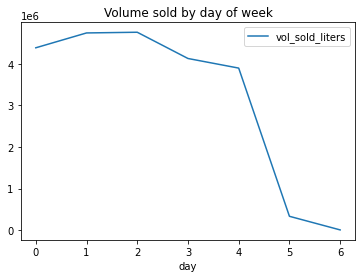

In [7]:
#Sales by day 

#Change datatype of date from object to datetime64
df2['date']=df2['date'].astype('datetime64')

#Get day of the week 
df2['day']=df2['date'].dt.dayofweek

#Plot the line graph in pandas 
#0 is Monday #6 is Sunday
volume_day=df2.groupby(by='day').aggregate({'vol_sold_liters':'sum'})
volume_day.plot(kind='line',title='Volume sold by day of week')


In [8]:
print('Store orders are very low on Saturday and zero on Sunday')

Store orders are very low on Saturday and zero on Sunday


<AxesSubplot:title={'center':'Volume sold by week'}, xlabel='week'>

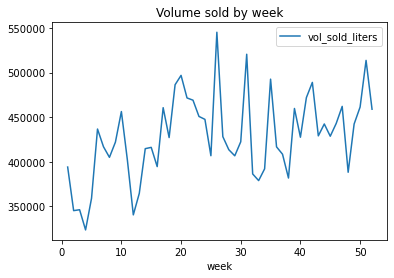

In [9]:
#Volume sold by week
#Pandas method
volume_week=df2.groupby(by=['week']).aggregate({'vol_sold_liters':'sum'}).sort_values(by='week',ascending=False)
volume_week.plot(kind='line',title= 'Volume sold by week')

<AxesSubplot:title={'center':'Volume sold by month'}, xlabel='month'>

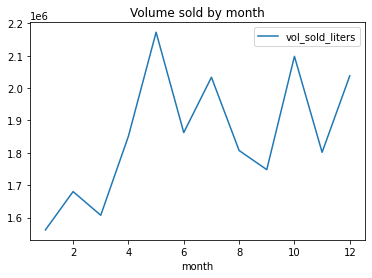

In [10]:
#Volume sold by month
volume_month=df2.groupby(by=['month']).aggregate({'vol_sold_liters':'sum'}).sort_values(by='month',ascending=False)
volume_month.plot(kind='line',title='Volume sold by month')

<ipython-input-11-cce907e3ad3b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_cv['percentage_vol'] = subset_cv['vol_sold_liters']/subset_cv['vol_sold_liters'].sum() * 100


[Text(0.5, 0, '% of volume sold')]

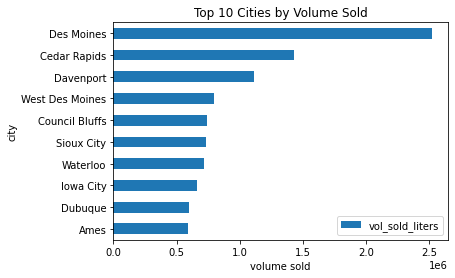

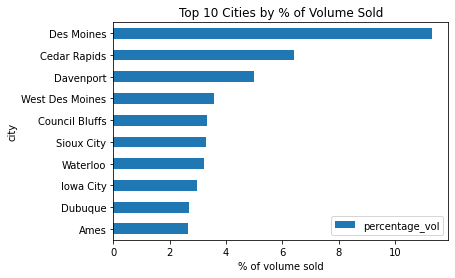

In [11]:
# Top 10 cities by volume sold

#Create a subset dataframe of city and vol_sold_liters
subset_cv=df2[['city','vol_sold_liters']]

#Group by cities and sum volume sold 
top_city_volume=subset_cv.groupby(by=['city']).aggregate({'vol_sold_liters': 'sum'}).sort_values(by='vol_sold_liters',ascending=True)

#Plot bar chart
#Pandas
plot=top_city_volume.tail(10).plot(kind='barh',title='Top 10 Cities by Volume Sold')
plot.set(xlabel='volume sold')

#Seaborn

#Create new column for percentage 
subset_cv['percentage_vol'] = subset_cv['vol_sold_liters']/subset_cv['vol_sold_liters'].sum() * 100

##Group by cities and sum percentage of volume sold 
top_city_volume2=subset_cv.groupby(by=['city']).aggregate({'percentage_vol':'sum'}).sort_values(by='percentage_vol',ascending=True)

#Plot bar chart 
#Pandas 
plot=top_city_volume2.tail(10).plot(kind='barh',title='Top 10 Cities by % of Volume Sold')
plot.set(xlabel='% of volume sold')

In [12]:
print('Question: Why are these cities in the top 10 in terms of sales?')
print('Answer: Higher number of stores and population')

Question: Why are these cities in the top 10 in terms of sales?
Answer: Higher number of stores and population


[Text(0.5, 0, '% of volume sold')]

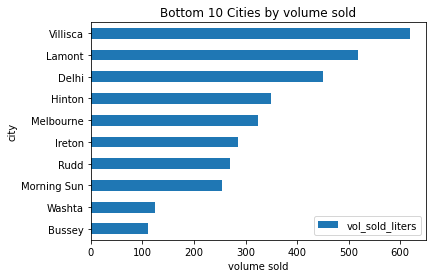

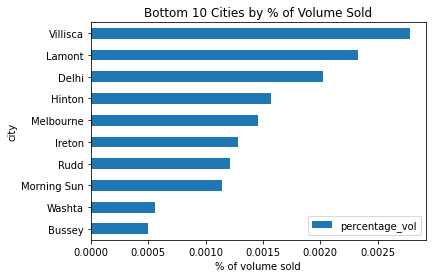

In [13]:
#Bottom 10 cities by volume sold 
bot_city_volume=subset_cv.groupby(by=['city']).aggregate({'vol_sold_liters': 'sum'}).sort_values(by='vol_sold_liters',ascending=True)

#Plot bar chart in pandas bottom 10 cities volume sold
plot=bot_city_volume[:10].plot(kind='barh',title='Bottom 10 Cities by volume sold')
plot.set(xlabel='volume sold')

#Create new column for percentage 
bot_city_volume['percentage_vol'] = bot_city_volume['vol_sold_liters']/subset_cv['vol_sold_liters'].sum() * 100

##Group by cities and sum percentage of volume sold 
bot_city_volume2=bot_city_volume.groupby(by='city').aggregate({'percentage_vol':'sum'}).sort_values(by='percentage_vol',ascending=True)

#Plot bar chart in pandas for bottom 10 cities percentage sold
plot=bot_city_volume2[:10].plot(kind='barh',title='Bottom 10 Cities by % of Volume Sold')
plot.set(xlabel='% of volume sold')

In [14]:
print('Question: Why are these cities in the bottom 10 in terms of sales?')
print('Answer: Small number of stores and population')

Question: Why are these cities in the bottom 10 in terms of sales?
Answer: Small number of stores and population


[Text(0.5, 0, 'number of stores')]

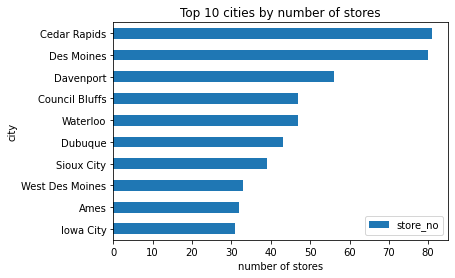

In [15]:
# Number of stores by cities (Top 10) 
city_stores=df2.groupby(by=['city']).aggregate({'store_no': 'nunique'}).sort_values(by='store_no',ascending=True)

#Plot bar chart in pandas 
plot=city_stores.tail(10).plot(kind='barh',title='Top 10 cities by number of stores')
plot.set(xlabel='number of stores')

In [16]:
print('Question: Why are there so many stores in Des Monies and Cedar Rapids?')
print('Answer: Des Monies and Cedar Rapids are the top 2 most populated cities in Iowa. Higher population will lead to higher sales')

Question: Why are there so many stores in Des Monies and Cedar Rapids?
Answer: Des Monies and Cedar Rapids are the top 2 most populated cities in Iowa. Higher population will lead to higher sales


[Text(0.5, 0, 'Number of stores')]

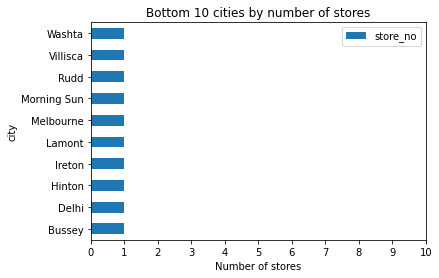

In [17]:
#Create subset of dataframe with city and store number columns
store_no_city=df2[['city','store_no']]

#Filter the cities to the bottom 10 cities with the volume sold
store_no_city2=store_no_city[store_no_city.city.isin(['Villisca','Lamont','Delhi','Hinton','Melbourne','Ireton','Rudd','Morning Sun','Washta','Bussey'])]

#Group by city and distinct count store_no
store_no_city3=store_no_city2.groupby(by='city').aggregate({'store_no':'nunique'}).sort_values(by='city',ascending=True)

#Plot graph in pandas 
plot=store_no_city3.plot(kind='barh',title='Bottom 10 cities by number of stores',xticks=[0,1,2,3,4,5,6,7,8,9,10])
plot.set(xlabel='Number of stores')

In [18]:
print('Question: Why are there so few stores in these cities ?')
print('Answer: These cities have population of less than 1200')

Question: Why are there so few stores in these cities ?
Answer: These cities have population of less than 1200


[Text(0.5, 0, 'population')]

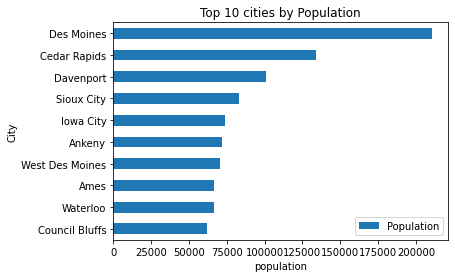

In [19]:
#Import population csv into dataframe
df_pop=pd.read_csv(r'C:\Users\BURROW\data_portfolio\Iowa_Alcohol_sales\data\raw\city_population.csv')

#Change columns name
df_pop.rename(columns={'name':'City','pop2021':'Population'},inplace=True)

#Get top 10 populated cities
topten_pop=df_pop.sort_values(by='Population',ascending=True)

#Plot the bar chart using pandas
plot=topten_pop.tail(10).plot(kind='barh',title='Top 10 cities by Population',x='City')
plot.set(xlabel='population')

[Text(0.5, 0, 'population')]

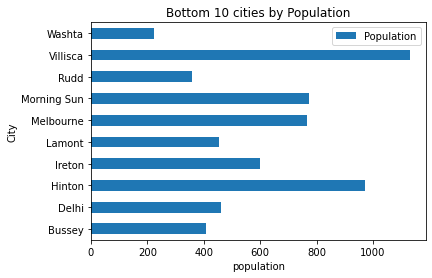

In [20]:
#Population dataframe
df_pop

#Filter dataframe according to the bottom 10 cities
df_pop_bottom=df_pop[df_pop['City'].isin(['Villisca','Lamont','Delhi','Hinton','Melbourne','Ireton','Rudd','Morning Sun','Washta','Bussey'])].sort_values(by='City',ascending=True)

#Plot the graph in pandas 
plot=df_pop_bottom.plot(kind='barh',x='City',title='Bottom 10 cities by Population')
plot.set(xlabel='population')

C:\Users\BURROW\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


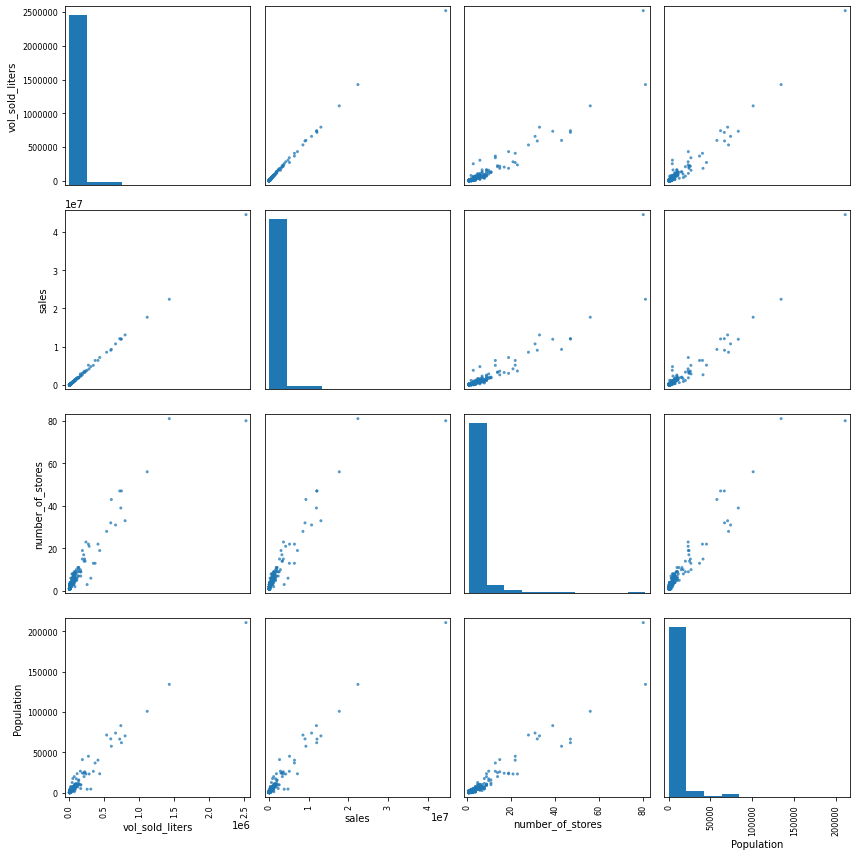

In [21]:
#Relationship between volume sold , population of city, number of stores in city

#Subset of Original dataframe 
relationship_df2=df2[['store_no','city','vol_sold_liters','sales']]

#Change column name from store_no to Number of stores
relationship_df2.rename(columns={'store_no':'number_of_stores'},inplace=True)

#Grouped by volume sold ,sales , number of stores
relationship_df3=relationship_df2.groupby(by='city').aggregate({'vol_sold_liters':'sum','sales':'sum','number_of_stores':'nunique'}).round(0)

#Merge the dataframe with population dataframe 
relationship_df4=relationship_df3.merge(right=df_pop,how='left',left_on='city',right_on='City')

#Scatter matrix using pandas
pd.plotting.scatter_matrix(relationship_df4,figsize=(12,12),alpha=0.75)

#Make the layout look good
plt.tight_layout()


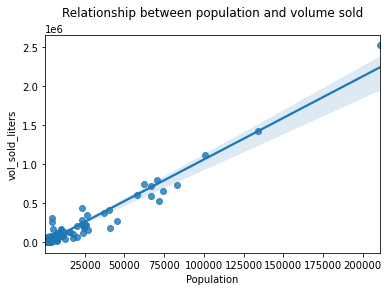

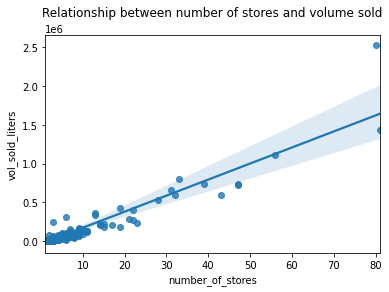

,vol_sold_liters,sales,number_of_stores,Population
vol_sold_liters,1.000000,0.998199,0.944409,0.977381
sales,0.998199,1.000000,0.929997,0.973815
number_of_stores,0.944409,0.929997,1.000000,0.957903
Population,0.977381,0.973815,0.957903,1.000000


In [22]:
#Relationship between population and vol_sold_liters
sns.regplot(x='Population',y='vol_sold_liters',data=relationship_df4)
plt.title('Relationship between population and volume sold',y=1.06)
plt.show()

#Relationship between number of stores and vol_sold_liters
sns.regplot(x='number_of_stores',y='vol_sold_liters',data=relationship_df4)
plt.title('Relationship between number of stores and volume sold',y=1.06)
plt.show()

#Pearson coefficent of population and vol_sold_liters , number of stores , sales
relationship_df4.corr(method='pearson')

In [23]:
print('Insight: From the scatterplots, it seems like the number of stores, population,volume sold and sales are highly correlated to one another')

Insight: From the scatterplots, it seems like the number of stores, population,volume sold and sales are highly correlated to one another


[Text(0.5, 0, 'Number of stores')]

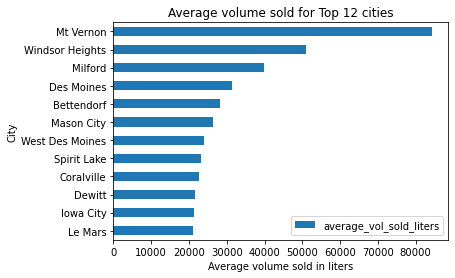

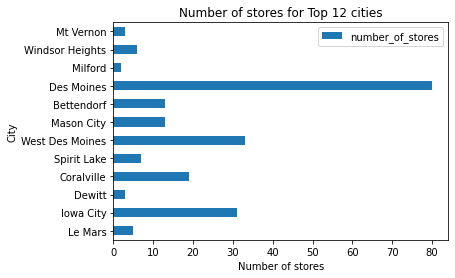

In [24]:
#Create new column of average vol sold in liters
relationship_df4['average_vol_sold_liters']= relationship_df4['vol_sold_liters'] / relationship_df4['number_of_stores']

#Filter the dataframe that has average_vol_sold of 20000 and above
df4_filtered=relationship_df4[relationship_df4['average_vol_sold_liters'] > 20000].sort_values(by='average_vol_sold_liters',ascending=True)

#Plot the graph of average_vol_sold 
plot=df4_filtered.plot(x='City',y='average_vol_sold_liters',kind='barh',title='Average volume sold for Top 12 cities',ylabel='Avg volume sold in liters')
plot.set(xlabel='Average volume sold in liters')

#Plot the graph of number of stores
plot2=df4_filtered.plot(x='City',y='number_of_stores',kind='barh',title='Number of stores for Top 12 cities')
plot2.set(xlabel='Number of stores')


In [25]:
print('Question: Which area is better for an alcohol store?')
print('Answer: Urban areas are better as the average volume sold per store is 2x more than rural areas')

Question: Which area is better for an alcohol store?
Answer: Urban areas are better as the average volume sold per store is 2x more than rural areas


<ipython-input-26-245674b1a001>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_volume['percentage_vol_sold'] =category_volume['vol_sold_liters']/category_volume['vol_sold_liters'].sum() * 100


<AxesSubplot:title={'center':'Percentage of volume sold by sub category'}>

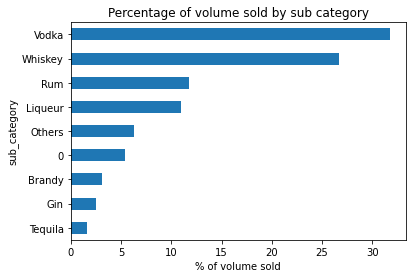

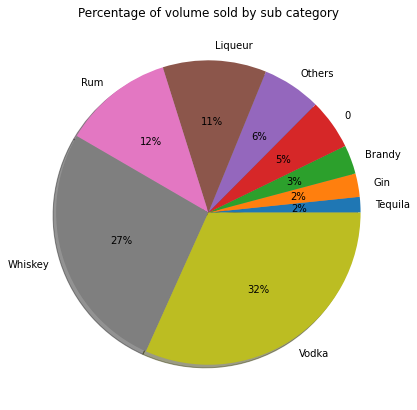

In [26]:
#Create a subset dataframe from the original dataframe 
category_volume=df2[['vol_sold_liters','sub_category']]

#Create a new column for percentage of volume sold 
category_volume['percentage_vol_sold'] =category_volume['vol_sold_liters']/category_volume['vol_sold_liters'].sum() * 100

#Group the sub_category and sum up the volume sold by liters 
category_volume2=category_volume.groupby(by='sub_category').aggregate({'vol_sold_liters':'sum','percentage_vol_sold':'sum'}).sort_values(by='vol_sold_liters',ascending=True)

#Plot the bar charts for percentage of volume sold by sub category using pandas
plot=category_volume2.plot(y='percentage_vol_sold',kind='barh',title='Percentage of volume sold by sub category',legend='')
plot.set(xlabel='% of volume sold')

#Plot the pie chart
category_volume2.plot(y='percentage_vol_sold',kind='pie',title='Percentage of volume sold by sub category',legend='',ylabel='',autopct='%1.0f%%',shadow=True,figsize=[7,7])

In [27]:
print('Question: What is the percentage of sub_category to stock up in an alcohol store')
print('Vodka is 30% , Whiskey is 30% , Rum is 10% , Liqueur is 10% , Everythin else is 20%')

Question: What is the percentage of sub_category to stock up in an alcohol store
Vodka is 30% , Whiskey is 30% , Rum is 10% , Liqueur is 10% , Everythin else is 20%


<ipython-input-28-90d885e3ec46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_volume['percentage_volume']=vendor_volume['vol_sold_liters'] / vendor_volume['vol_sold_liters'].sum() * 100


[Text(0.5, 0, '% of volume sold')]

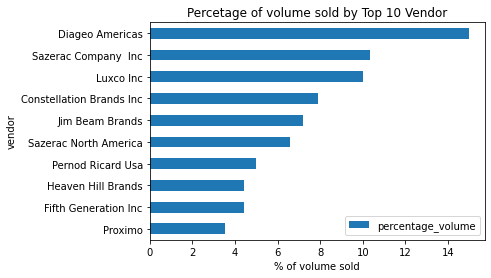

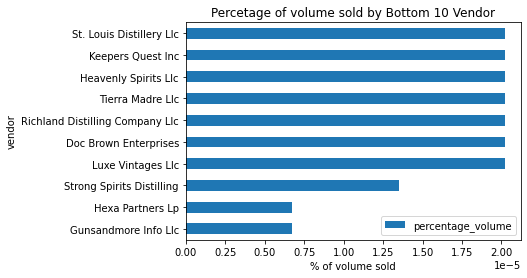

In [28]:
#Create a sub dataframe from original dataframe
vendor_volume=df2[['vol_sold_liters','vendor']]

#Create a new percentage column
vendor_volume['percentage_volume']=vendor_volume['vol_sold_liters'] / vendor_volume['vol_sold_liters'].sum() * 100

#Perecntage of sales by top 10 vendor
vendor_volume2=vendor_volume.groupby(by=['vendor']).aggregate({'percentage_volume': 'sum'}).sort_values(by='percentage_volume',ascending=True)

#Plot bar chart in pandas
plot=vendor_volume2.tail(10).plot(kind='barh',title='Percetage of volume sold by Top 10 Vendor')
plot.set(xlabel='% of volume sold')




#Perecntage of sales by bottom 10 vendor
vendor_volume3=vendor_volume.groupby(by=['vendor']).aggregate({'percentage_volume': 'sum'}).sort_values(by='percentage_volume',ascending=True)

#Plot bar chart in pandas
plot=vendor_volume3[:10].plot(kind='barh',title='Percetage of volume sold by Bottom 10 Vendor')
plot.set(xlabel='% of volume sold')

In [29]:
print('Question: Why are these vendors in the top 10 or bottom 10?')
print('Answer: The brands in the top 10 are more well-known compared to the brands in the bottom 10.')

Question: Why are these vendors in the top 10 or bottom 10?
Answer: The brands in the top 10 are more well-known compared to the brands in the bottom 10.


<ipython-input-30-0137bc8bbe17>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_volume['percentage_vol'] = item_volume['vol_sold_liters'] / item_volume['vol_sold_liters'].sum() * 100


[Text(0.5, 0, '% of volume sold')]

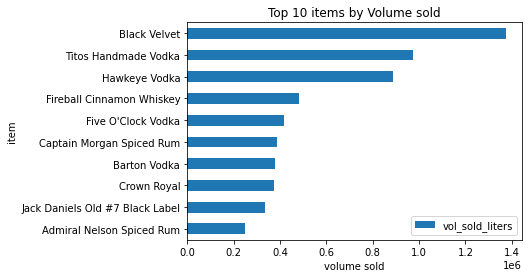

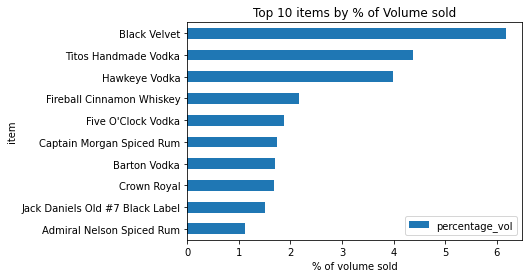

In [30]:
#Top 10 items by volume sold

#Create subset of dataset from volume sold and item
item_volume=df2[['vol_sold_liters','item']]

#Create new column percentage volume
item_volume['percentage_vol'] = item_volume['vol_sold_liters'] / item_volume['vol_sold_liters'].sum() * 100

#Group by item and sum volumes sold liters 
item_volume2=item_volume.groupby(by=['item']).aggregate({'vol_sold_liters': 'sum'}).sort_values(by='vol_sold_liters',ascending=True)


#Top 10 items by volume sold by percentage

#Plot bar chars in pandas
plot=item_volume2.tail(10).plot(kind='barh',title='Top 10 items by Volume sold')
plot.set(xlabel='volume sold')

#Group by item and sum percentage_vol
item_volume3=item_volume.groupby(by=['item']).aggregate({'percentage_vol': 'sum'}).sort_values(by='percentage_vol',ascending=True)

#Plot bar chars in pandas
plot=item_volume3.tail(10).plot(kind='barh',title='Top 10 items by % of Volume sold',)
plot.set(xlabel='% of volume sold')

In [31]:
#Top 20 Vodka items

#Filter the vokda sub category only
vodka_df=df2[df2['sub_category'] == 'Vodka']

#Group by item and sub category , sum of volume sold liters
vodka_df2=vodka_df.groupby(by=['item','sub_category','pack','bottle_vol_ml','bottle_retail']).aggregate({'vol_sold_liters':'sum'}).reset_index()

#Sort the values by top 20 rows
vodka_df2.sort_values(by='vol_sold_liters',ascending=False)[:20]

,item,sub_category,pack,bottle_vol_ml,bottle_retail,vol_sold_liters
328,Hawkeye Vodka,Vodka,6,1750,10.76,551081.50
740,Titos Handmade Vodka,Vodka,6,1750,28.50,376169.00
743,Titos Handmade Vodka,Vodka,12,1000,19.02,339301.00
273,Five O'Clock Vodka,Vodka,6,1750,10.80,238995.75
742,Titos Handmade Vodka,Vodka,12,750,14.46,237504.00
68,Barton Vodka,Vodka,12,1000,5.96,224080.00
329,Hawkeye Vodka,Vodka,12,750,5.01,179364.00
694,Svedka 80prf,Vodka,6,1750,19.50,178377.05
374,Kirkland Signature American Vodka,Vodka,6,1750,11.61,139492.50
66,Barton Vodka,Vodka,6,1750,10.38,128987.25


In [32]:
#Top 20 Whiskey items

#Filter the whiskey sub category only
whiskey_df=df2[df2['sub_category'] == 'Whiskey']

#Group by item and sub category ,sum of volume sold liters
whiskey_df2=whiskey_df.groupby(by=['item','sub_category','pack','bottle_vol_ml','bottle_retail']).aggregate({'vol_sold_liters':'sum'})

#Sort the values by top 20 rows
whiskey_df2.sort_values(by='vol_sold_liters',ascending=False)[:20]

,,,,,vol_sold_liters
item,sub_category,pack,bottle_vol_ml,bottle_retail,
Black Velvet,Whiskey,6,1750,15.68,1014842.75
Jack Daniels Old #7 Black Label,Whiskey,12,1000,28.34,151442.00
Seagrams 7 Crown,Whiskey,6,1750,19.44,144000.50
Crown Royal,Whiskey,12,1000,28.34,141929.00
Black Velvet,Whiskey,12,1000,9.95,135159.00
Crown Royal,Whiskey,12,750,23.39,125042.30
Black Velvet,Whiskey,12,750,7.85,120134.25
Crown Royal Regal Apple,Whiskey,12,750,23.39,109241.25
Windsor Canadian PET,Whiskey,6,1750,14.25,99037.75


In [33]:
#Top 20 Rum items

#Filter the rum sub category only
rum_df=df2[df2['sub_category'] == 'Rum']

#Group by item and sub category , sum of volume sold liters
rum_df2=rum_df.groupby(by=['item','sub_category','pack','bottle_vol_ml','bottle_retail']).aggregate({'vol_sold_liters':'sum'})

#Sort the values by top 20 rows
rum_df2.sort_values(by='vol_sold_liters',ascending=False)[:20]

,,,,,vol_sold_liters
item,sub_category,pack,bottle_vol_ml,bottle_retail,
Captain Morgan Spiced Rum,Rum,12,1000,17.62,228778.00
Admiral Nelson Spiced Rum,Rum,6,1750,17.33,161059.50
Captain Morgan Spiced Barrel,Rum,6,1750,27.00,154271.45
Captain Morgan Spiced Rum,Rum,6,1750,27.00,126071.75
Captain Morgan Original Spiced,Rum,12,750,13.59,108671.25
Malibu Coconut Rum,Rum,12,1000,16.48,97597.00
Paramount White Rum,Rum,6,1750,11.76,93959.25
Malibu Coconut Rum,Rum,12,750,11.24,77176.50
Bacardi Superior,Rum,6,1750,22.50,75904.50


In [34]:
#Top 20 Liqueur items

#Filter the liquer sub category only
liqueur_df=df2[df2['sub_category'] == 'Liqueur']

#Group by item and sub category , sum of volume sold liters
liqueur_df2=liqueur_df.groupby(by=['item','sub_category','pack','bottle_vol_ml','bottle_retail']).aggregate({'vol_sold_liters':'sum'})

#Sort the values by top 20
liqueur_df2.sort_values(by='vol_sold_liters',ascending=False).reset_index()[:20]

,item,sub_category,pack,bottle_vol_ml,bottle_retail,vol_sold_liters
0,Fireball Cinnamon Whiskey,Liqueur,6,1750,23.00,138836.25
1,Fireball Cinnamon Whiskey,Liqueur,12,750,13.50,134838.70
2,Fireball Cinnamon Whiskey,Liqueur,12,1000,17.02,132586.00
3,Fireball Cinnamon,Liqueur,48,100,1.35,126301.20
4,Fireball Cinnamon Whiskey Mini Dispenser,Liqueur,1,3000,45.00,112703.00
5,Fireball Cinnamon Whiskey PET,Liqueur,12,750,13.47,92747.25
6,Fireball Cinnamon Whisky,Liqueur,24,375,8.00,79453.34
7,Juarez Triple Sec,Liqueur,12,1000,3.63,76473.00
8,Dr McGillicuddys Cherry,Liqueur,12,1000,16.50,66483.00
9,Dekuyper Luscious Peachtree,Liqueur,12,1000,11.81,65940.00
